# ERAI grib & NetCDF files manipulation

In [ ]:
#to use the full width of the browser window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import numpy as np
from pyresample import bilinear, geometry, kd_tree
from pyresample import utils
import pandas as pd
import glob
import pyproj
from gribapi import *
import datetime
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
import xarray as xr
from copy import deepcopy


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
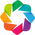

In [2]:
hv.extension('bokeh')

In [3]:
%matplotlib notebook

In [4]:
folder= '/Users/brey/DATA/ERAI/'

In [5]:
#define in a dictionary the properties of the model..
minlon = -180. # lat/lon window
maxlon = 180.
minlat = -90.
maxlat = 90.
start_date = '2017-1-1'
end_date = '2017-1-10 12'

In [ ]:
#creating a sequence of folder from which we read the meteo.
files = glob.glob(folder+'/eraInterim*')

In [ ]:
files.sort()

In [ ]:
files

In [ ]:
import pygrib

In [ ]:
d = pygrib.open(files[0])

In [ ]:
for v in d:
    print v

In [ ]:
def gridd(lon1,lat1,lon2,lat2,nlats):

            #   lon1, lat1 = self.longitude_first_gridpoint, self.latitude_first_gridpoint
            #   lon2, lat2 = self.longitude_last_gridpoint, self.latitude_last_gridpoint
            #   nlats = self.points_in_y_direction
                # ECMWF 'reduced' gaussian grid.
                nlons = 2*nlats
                delon = 360./nlons
            #   lons = np.arange(lon1,lon2,delon)
                lons = np.linspace(lon1,lon2,nlons)
                # compute gaussian lats (north to south)
                lats = gaulats(nlats)
                if lat1 > lat2 :
                    lats = lats[::-1]
              # lons = lons[::-1]
                lons,lats = np.meshgrid(lons,lats) # make 2-d arrays

                return lons,lats


def getd(gid):
           # gid = grib_new_from_file(f)#,headers_only = True)

            name=grib_get(gid, 'shortName')
            mv=grib_get(gid,'missingValue')

            lonfgp=grib_get(gid,'longitudeOfFirstGridPointInDegrees')
            latfgp=grib_get(gid,'latitudeOfFirstGridPointInDegrees')
            lonlgp=grib_get(gid,'longitudeOfLastGridPointInDegrees')
            latlgp=grib_get(gid,'latitudeOfLastGridPointInDegrees')

            if grib_get(gid,'gridType') == 'regular_gg':

                Ni=grib_get(gid,'Ni')
                Nj=grib_get(gid,'Nj')
                lat=grib_get_array(gid,'latitudes')
                lat=lat.reshape(Nj,Ni)
                lat=np.flipud(lat)
                lon=grib_get_array(gid,'longitudes')
                lon=lon.reshape(Nj,Ni)

                values=grib_get_values(gid)
                dat=values.reshape(Nj,Ni)
                dat=np.flipud(dat)
          
            elif grib_get(gid,'gridType') == 'reduced_gg' :

                ss=grib_get_array(gid,'pl')  # lons per lat for the reduced_gg grid
                lon,lat = gridd(lonfgp,latfgp,lonlgp,latlgp,ss.size)

                values=grib_get_values(gid)
                ny=2*np.size(ss)

                dat=_redtoreg(ny,ss,values,mv)
                dat=np.flipud(dat)
                

            elif grib_get(gid,'gridType') == 'regular_ll':

                Ni=grib_get(gid,'Ni')
                Nj=grib_get(gid,'Nj')
                lat=grib_get_array(gid,'latitudes')
                lat=lat.reshape(Nj,Ni)
                lat=np.flipud(lat)
                lon=grib_get_array(gid,'longitudes')
                lon=lon.reshape(Nj,Ni)

                values=grib_get_values(gid)
                dat=values.reshape(Nj,Ni)
                dat=np.flipud(dat)
        
    
            grib_release(gid)

            return name,dat,lon,lat



In [ ]:
filenames = files

# read grib file and append to xarray
pt=[]
ut=[]
vt=[]
tt=[]

for filename in filenames:
        
    #--------------------------------------------------------------------- 
    sys.stdout.flush()
    sys.stdout.write('\n')
    sys.stdout.write('extracting meteo from {}\n'.format(filename))
    sys.stdout.flush()
    #---------------------------------------------------------------------        

    try: 
        f = open(filename)
    except:
        print 'no file {}'.format(filename)
        sys.exit(1)
    while True:
        try:
            gid = grib_new_from_file(f)#,headers_only = True)
            if gid is None: 
                sys.stdout.write('end of file {}\n'.format(filename))
                break
            
            date=grib_get(gid, 'date')
            dataTime=grib_get(gid, 'dataTime')
            stepRange=grib_get(gid, 'stepRange')
            timestamp = pd.to_datetime(str(date)) + pd.to_timedelta('{}H'.format(dataTime/100.))
            tstamp = timestamp+pd.to_timedelta('{}H'.format(stepRange))
            if tstamp <= pd.to_datetime(end_date):
                
                name,varin,ilon,ilat=getd(gid)    

            else:
                grib_release(gid)
                if tstamp > pd.to_datetime(end_date) : break
                continue
                
            lon=ilon[0,:]
            lat=ilat[:,0]
           
        # verbose 
        #--------------------------------------------------------------------- 
            sys.stdout.flush()
            sys.stdout.write('\n')
            sys.stdout.write('retrieving {} at {}\n'.format(name, tstamp))
            sys.stdout.flush()
        #---------------------------------------------------------------------        
        
        
        # shift grid according to minlon
            if minlon < 0. :
                lon=lon-180.
                zlon=lon.shape[0]
                varin_ = np.hstack([varin[:,zlon/2:],varin[:,0:zlon/2]])
                varin  = varin_

            i1=np.abs(lon-minlon).argmin()-2
            i2=np.abs(lon-maxlon).argmin()+2
            j1=np.abs(lat-minlat).argmin()-2
            j2=np.abs(lat-maxlat).argmin()+2
    
            if i1 < 0 : i1 = 0 # fix limits
            if i2 > lon.shape[0] : i2 = lon.shape[0]   
            if j1 < 0 : j1 = 0
            if j2 > lat.shape[0]: j2 = lat.shape[0]
            

            lons, lats = np.meshgrid(lon[i1:i2],lat[j1:j2])
            data = deepcopy(varin[j1:j2,i1:i2])

        # mask the window

            if name == 'msl' : 
                     pt.append(data)
                     tt.append(tstamp)
            elif name == '10u':
                     ut.append(data)
            elif name == '10v':
                     vt.append(data)


    # END OF FOR

        except Exception as e:
            print e
            print 'ERROR in meteo file {}'.format(date)

    f.close()

    met = xr.Dataset({'msl': (['time', 'latitude', 'longitude'],  np.array(pt)), 
                          'u10': (['time', 'latitude', 'longitude'], np.array(ut)),   
                          'v10': (['time', 'latitude', 'longitude'], np.array(vt)),   
                          'lons': (['x', 'y'], lons),   
                          'lats': (['x', 'y'], lats)},   
                          coords={'longitude': ('longitude', lons[0,:]),   
                                  'latitude': ('latitude', lats[:,0]),   
                                  'time': tt })   
#                        'time': pd.date_range(date+datetime.timedelta(hours=ft1), periods=ft2-ft1, freq='{}H'.format(dft))})   
#                        'reference_time': date })
    


In [415]:
met

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 480, time: 39, x: 241, y: 480)
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.25 -88.5 -87.75 -87.0 -86.25 ...
  * longitude  (longitude) float64 -180.0 -179.2 -178.5 -177.8 -177.0 -176.2 ...
  * time       (time) datetime64[ns] 2017-01-01 2017-01-01T06:00:00 ...
Dimensions without coordinates: x, y
Data variables:
    u10        (time, latitude, longitude) float64 -4.109 -4.183 -4.256 ...
    v10        (time, latitude, longitude) float64 9.331 9.257 9.182 9.107 ...
    msl        (time, latitude, longitude) float64 1.002e+05 1.002e+05 ...
    lons       (x, y) float64 -180.0 -179.2 -178.5 -177.8 -177.0 -176.2 ...
    lats       (x, y) float64 -90.0 -90.0 -90.0 -90.0 -90.0 -90.0 -90.0 ...

In [416]:
met.msl.shape

(39, 241, 480)

In [ ]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs

from mpl_toolkits.axes_grid1 import make_axes_locatable


proj=ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(12, 8))

ax = plt.axes(projection=proj)

h = ax.contourf(lons,lats,met.msl[0,], transform=proj);

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.5, axes_class=plt.Axes)


fig.add_axes(ax_cb)
plt.colorbar(h, cax=ax_cb)
#ax.set_global(); 
ax.coastlines();

In [ ]:
met.dims.keys()[:3], met.variables.keys()[:3]

In [ ]:
dp = hv.Dataset(met,kdims=met.dims.keys()[:3],vdims=met.variables.keys()[:3])

In [ ]:
%%opts Image [width=650 height=450] (cmap='jet')
dp.to(hv.Image, ['longitude','latitude'], 'msl').hist()

In [ ]:
gp = gv.Dataset(met,kdims=met.dims.keys()[:3],vdims=met.variables.keys()[:3])

In [ ]:
%%opts Image [colorbar=True width=650 height=450 toolbar="above"  tools=['hover']] (cmap='viridis')
gp.to(gv.Image, ['longitude','latitude'], 'msl', dynamic=False) * gf.coastline() * gf.borders()

## NetCDF Variant

In [ ]:
#creating a sequence of folder from which we read the meteo.
msl_file = glob.glob(folder+'/msl*')

msl_file

In [ ]:
ncmsl = xr.open_dataset(msl_file[0])

In [ ]:
ncmsl.msl.shape

In [ ]:
ncmsl.latitude

In [ ]:
#flipud to reverse lat
for i in range(ncmsl.time.shape[0]):
    ncmsl.msl.data[i,:,:] = np.flipud(ncmsl.msl.data[i,:,:])
ncmsl['latitude'] = ncmsl.latitude.data[::-1]

In [401]:
minlon, maxlon, minlat, maxlat

(-180.0, 180.0, -90.0, 90.0)

In [402]:
#for global
if ([minlon,maxlon] == [-180.,180.]) or ([minlon,maxlon] == [0.,360.]) :
    minlon=ncmsl.longitude.data.min()
    maxlon=ncmsl.longitude.data.max()



In [403]:

if minlon < ncmsl.longitude.min() : minlon = minlon + 360.
      
if maxlon < ncmsl.longitude.min() : maxlon = maxlon + 360.
      
if minlon > ncmsl.longitude.max() : minlon = minlon - 360.
      
if maxlon > ncmsl.longitude.max() : maxlon = maxlon - 360.


In [404]:
minlon, maxlon, minlat, maxlat

(0.0, 359.25, -90.0, 90.0)

In [405]:
tslice=slice(start_date, end_date)
    
i0=np.abs(ncmsl.longitude.data-minlon).argmin()
i1=np.abs(ncmsl.longitude.data-maxlon).argmin()

      
j0=np.abs(ncmsl.latitude.data-minlat).argmin()
j1=np.abs(ncmsl.latitude.data-maxlat).argmin()


In [406]:
i0,i1,j0,j1

(0, 479, 0, 240)

In [407]:
if i0 > 0 : i0 = i0 - 1
if i1 < ncmsl.msl.shape[2] - 1 : i1 = i1 + 1
if j0 > 0 : j0 = j0 - 1
if j1 < ncmsl.msl.shape[1] - 1 : j1 = j1 + 1

In [408]:
i0,i1,j0,j1

(0, 479, 0, 240)

In [409]:
if i0 > i1 :

        sh = (
              ncmsl[['msl']]
              .isel(longitude=slice(i0,ncmsl.longitude.size),latitude=slice(j0,j1+1))
              .sel(time=tslice)
              )
        sh.longitude.values = sh.longitude.values -360.

        sh1 = (
              ncmsl[['msl']]
              .isel(longitude=slice(0,i1+1),latitude=slice(j0,j1+1))
              .sel(time=tslice)
              )
              
        tot = xr.concat([sh,sh1],dim='longitude')
          
else:            

        tot = (
              ncmsl[['msl']]
              .isel(longitude=slice(i0,i1+1),latitude=slice(j0,j1+1))
              .sel(time=tslice)
              )


In [411]:
tot.msl

<xarray.DataArray 'msl' (time: 39, latitude: 241, longitude: 480)>
array([[[100241.59 , 100241.59 , ..., 100241.59 , 100241.59 ],
        [100266.79 , 100267.95 , ..., 100264.45 , 100265.86 ],
        ...,
        [103506.97 , 103508.6  , ..., 103503.234, 103505.336],
        [103433.25 , 103433.25 , ..., 103433.25 , 103433.25 ]],

       [[100278.45 , 100278.45 , ..., 100278.45 , 100278.45 ],
        [100305.05 , 100305.516, ..., 100303.65 , 100304.35 ],
        ...,
        [103336.9  , 103338.3  , ..., 103333.63 , 103335.03 ],
        [103274.375, 103274.375, ..., 103274.375, 103274.375]],

       ...,

       [[100969.93 , 100969.93 , ..., 100969.93 , 100969.93 ],
        [100932.37 , 100933.07 , ..., 100930.734, 100931.67 ],
        ...,
        [101577.88 , 101576.484, ..., 101580.22 , 101579.05 ],
        [101606.34 , 101606.34 , ..., 101606.34 , 101606.34 ]],

       [[100899.01 , 100899.01 , ..., 100899.01 , 100899.01 ],
        [100871.71 , 100872.414, ..., 100870.31 , 100871

In [410]:
met.msl[0,:,:]

<xarray.DataArray 'msl' (latitude: 241, longitude: 480)>
array([[100241.5 , 100241.5 , 100241.5 , ..., 100241.5 , 100241.5 , 100241.5 ],
       [100178.25, 100177.75, 100177.25, ..., 100179.75, 100179.25, 100178.75],
       [100058.25, 100057.75, 100057.  , ..., 100061.5 , 100060.5 , 100059.25],
       ...,
       [103264.75, 103260.75, 103257.  , ..., 103276.5 , 103272.75, 103268.75],
       [103354.5 , 103352.75, 103350.75, ..., 103360.75, 103358.75, 103356.75],
       [103433.25, 103433.25, 103433.25, ..., 103433.25, 103433.25, 103433.25]])
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.25 -88.5 -87.75 -87.0 -86.25 ...
  * longitude  (longitude) float64 -180.0 -179.2 -178.5 -177.8 -177.0 -176.2 ...
    time       datetime64[ns] 2017-01-01

In [412]:
dif = met.msl - tot.msl

<IPython.core.display.Javascript object>


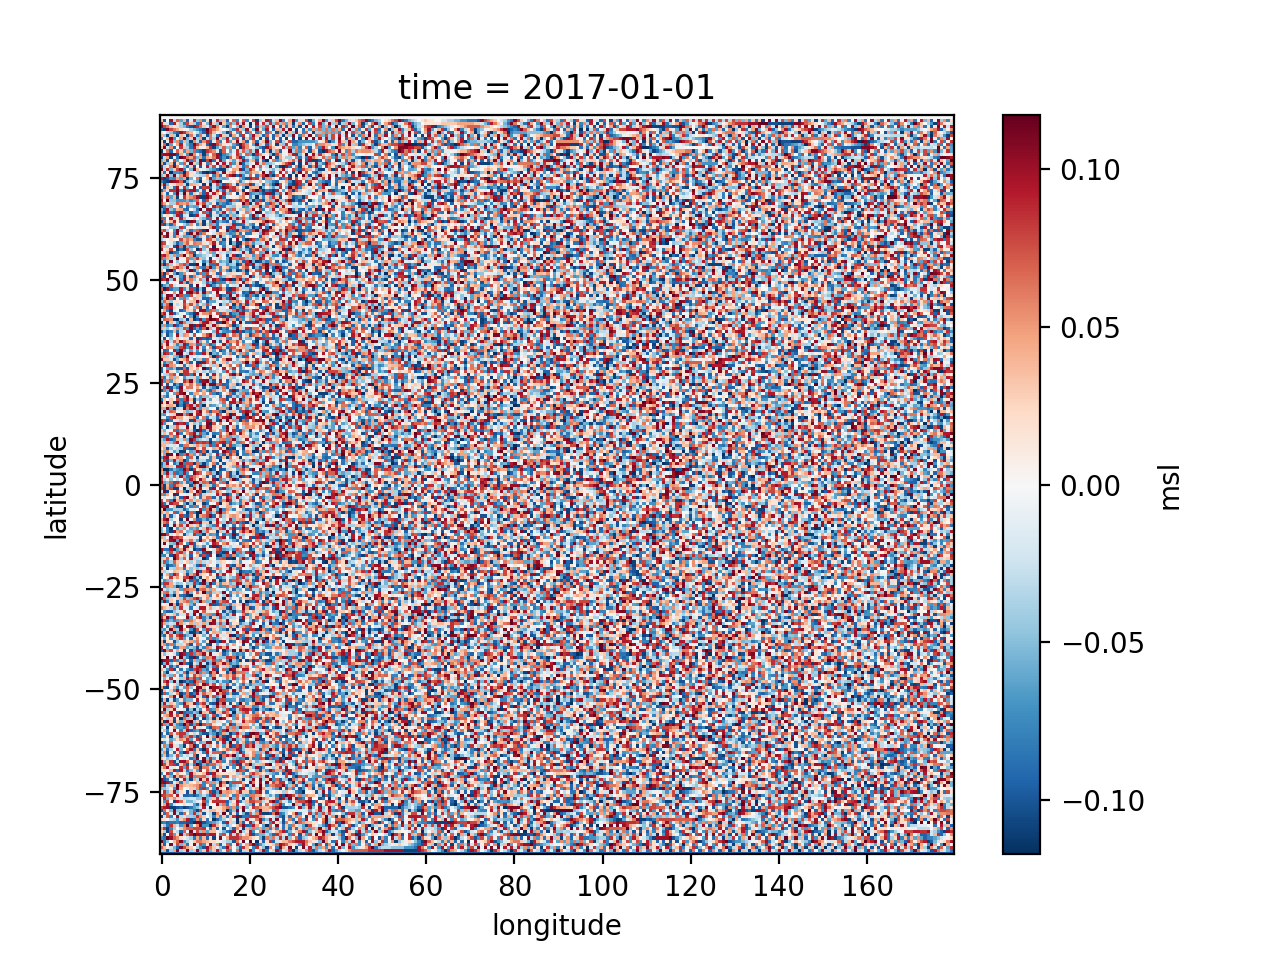

In [414]:
dif[0,:,:].plot()